In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import layers, models

In [20]:
def prepareData():
    allData = pd.read_csv("data/songs_with_genre.csv", index_col=0,header=[0, 1, 2])
    genres = allData["genre_id"]
    genres_index = pd.read_csv("data/genres_no_zeroes.csv", index_col=0)
    genres.columns = range(genres.shape[1])
    allData.drop(columns=["genre_id"], inplace=True)
    data_x = allData
    data_x.columns = range(data_x.shape[1])
    curr = genres_index['genre_index']
    late = genres[0].unique().tolist()
    update_genres = {late[i]:curr[i] for i in range(len(curr))}
    #normalizing
    mu = np.mean(data_x, axis=0)
    sigma = (np.std(data_x, axis=0))
    data_x = (data_x - mu) / sigma
    #Creating the right lables
    genres.columns = range(genres.shape[1])
    genres[0]=genres[0].map(update_genres)
    targets = OneHotEncoder().fit_transform(genres_index).toarray()
    #generes[0] = generes[0] - 1
    data_y = [targets[i - 1] for i in genres[0]]
    genres[0] = data_y
    # print(genres)
    test = genres.copy()
    test.rename(columns={0: "oneHotVector"}, inplace=True)
    # test.shape
    split = pd.DataFrame(test["oneHotVector"].to_list(), columns=range(16))
    split.index = genres.index
    genres = split
    return data_x, genres

In [21]:
data, labels = prepareData()
#data = data.reshape(-1, 1, 518)

x_train, x_rest, y_train, y_rest = train_test_split(data, labels, train_size=0.8)
x_test, x_valid, y_test, y_valid = train_test_split(x_rest, y_rest, train_size=0.5)

In [22]:
CNN = models.Sequential()
#CNN.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
CNN.add(layers.Conv1D(filters=32, kernel_size=6, activation='relu',input_shape=(518,1),padding='SAME'))
CNN.add(layers.MaxPooling1D(5))
CNN.add(layers.Dropout(0.3))
CNN.add(layers.Conv1D(filters=64, kernel_size=6, activation='relu'))
CNN.add(layers.MaxPooling1D(5))
CNN.add(layers.Conv1D(filters=128, kernel_size=6, activation='relu'))
CNN.add(layers.MaxPooling1D(5))
CNN.add(layers.Dropout(0.3))
CNN.add(layers.Flatten())
#CNN.add(layers.Conv1D(128, 5, activation='relu'))
#CNN.add(layers.Dense(256, activation='relu'))
CNN.add(layers.Dense(128, activation='relu'))
#CNN.add(layers.Dense(6528, activation='relu'))
CNN.add(layers.Dense(16,activation='softmax'))

In [23]:
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 518, 32)           224       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 103, 32)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 103, 32)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 98, 64)            12352     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 14, 128)          

In [24]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=10,verbose=1),tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=10,verbose=1)]
CNN.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [25]:
training = CNN.fit(x_train,y_train,epochs=100, validation_data=(x_valid,y_valid),batch_size=102,callbacks=callback)

Epoch 1/100
389/389 [==============================] - 18s 44ms/step - loss: 1.8051 - accuracy: 0.3977 - val_loss: 1.5723 - val_accuracy: 0.4843
Epoch 2/100
389/389 [==============================] - 17s 44ms/step - loss: 1.5262 - accuracy: 0.5048 - val_loss: 1.4144 - val_accuracy: 0.5581
Epoch 3/100
389/389 [==============================] - 17s 44ms/step - loss: 1.4277 - accuracy: 0.5392 - val_loss: 1.3301 - val_accuracy: 0.5815
Epoch 4/100
389/389 [==============================] - 17s 45ms/step - loss: 1.3637 - accuracy: 0.5593 - val_loss: 1.3115 - val_accuracy: 0.5813
Epoch 5/100
389/389 [==============================] - 17s 43ms/step - loss: 1.3238 - accuracy: 0.5753 - val_loss: 1.2612 - val_accuracy: 0.6000
Epoch 6/100
389/389 [==============================] - 17s 43ms/step - loss: 1.2972 - accuracy: 0.5844 - val_loss: 1.2410 - val_accuracy: 0.6016
Epoch 7/100
389/389 [==============================] - 17s 43ms/step - loss: 1.2738 - accuracy: 0.5922 - val_loss: 1.2236 - val_ac

In [26]:
x_train.shape

(39678, 518)

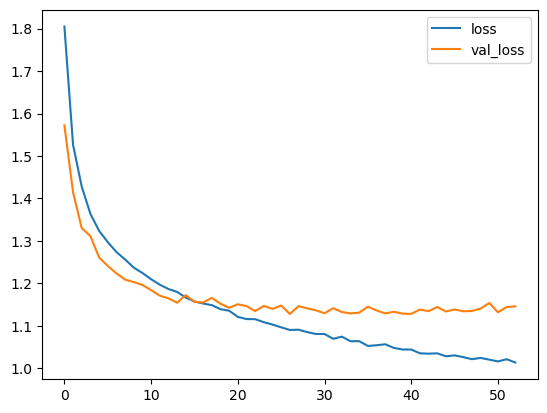

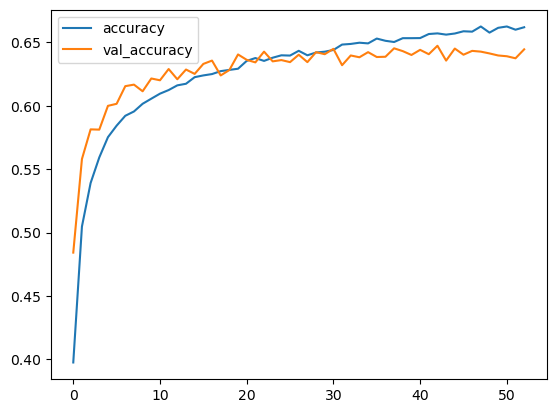

In [27]:
metrics_df = pd.DataFrame(training.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();# The semicolon prevents certain matplotlib items from being printed.

In [28]:
print(training.history)

{'loss': [1.805073857307434, 1.5262346267700195, 1.4277461767196655, 1.3637102842330933, 1.3238003253936768, 1.2972171306610107, 1.273823618888855, 1.2563071250915527, 1.2370147705078125, 1.2244423627853394, 1.2097301483154297, 1.1968551874160767, 1.1866651773452759, 1.179889440536499, 1.1664963960647583, 1.1573323011398315, 1.1525901556015015, 1.1486787796020508, 1.1391911506652832, 1.135520100593567, 1.1210417747497559, 1.1159648895263672, 1.1156723499298096, 1.108485460281372, 1.1030327081680298, 1.0964750051498413, 1.0902361869812012, 1.0909124612808228, 1.0852607488632202, 1.0807602405548096, 1.080758810043335, 1.0694584846496582, 1.0745456218719482, 1.0636389255523682, 1.063852310180664, 1.052559494972229, 1.054240345954895, 1.0565006732940674, 1.0479472875595093, 1.044269323348999, 1.0441539287567139, 1.0352672338485718, 1.0344159603118896, 1.03523588180542, 1.0282725095748901, 1.0302951335906982, 1.0262905359268188, 1.0213990211486816, 1.0243892669677734, 1.0202901363372803, 1.

In [29]:
y_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
track_id,,,,,,,,,,,,,,,,
111780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75779,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85176,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52492,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120589,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
test_loss, test_acc = CNN.evaluate(x_test,y_test)

155/155 [==============================] - 1s 8ms/step - loss: 1.1344 - accuracy: 0.6317


In [31]:
test_acc

0.6316532492637634